In [18]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [127]:
df = pd.read_csv('corrected_data.csv', skipinitialspace=True, sep=',', index_col=0)

In [128]:
df = df[df['температура_воздуха_в_помещении'] < 40]
df = df[df['среднемесячная_температура_на_улице'] < 40]
df = df[df['скорость_воздуха'] < 8]

In [129]:
unq = df['климат'].unique()
enc = {unq[i]: i for i in range(len(unq))}
df['климат'] = df['климат'].apply(lambda x: enc[x])

In [130]:
factors = df[['время_года', 
         'климат', 
         'способ_охлаждения', 
         'режим_при_смешанном_типе_охлаждения', 
         'способ_обогрева', 
         'температура_воздуха_в_помещении', 
         'температура_воздуха_на_улице', 
         'rh', 
         'скорость_воздуха', 
         'занавески', 
         'вентилятор', 
         'окно', 
         'двери', 
         'среднемесячная_температура_на_улице']]

In [131]:
types = {
    'время_года': 'cat', 
    'климат': 'cat', 
    'способ_охлаждения': 'cat', 
    'режим_при_смешанном_типе_охлаждения': 'cat', 
    'способ_обогрева': 'cat', 
    'температура_воздуха_в_помещении': 'num', 
    'температура_воздуха_на_улице': 'num', 
    'rh': 'num', 
    'скорость_воздуха': 'num', 
    'занавески': 'cat',
    'вентилятор': 'cat', 
    'окно': 'cat', 
    'двери': 'cat', 
    'среднемесячная_температура_на_улице': 'num'
}

In [121]:
def get_plot(col1, col2, type1, type2, i, j):
    global ax
    if type1 != type2:
        if type1 == 'cat':
            sns.boxplot(x=col1, y=col2, ax=ax[i, j])
        else:
            sns.boxplot(x=col2, y=col1, ax=ax[i, j])
    else:
        sns.scatterplot(x=col1, y=col2, ax=ax[i, j], hue=factors['климат'], legend=False)

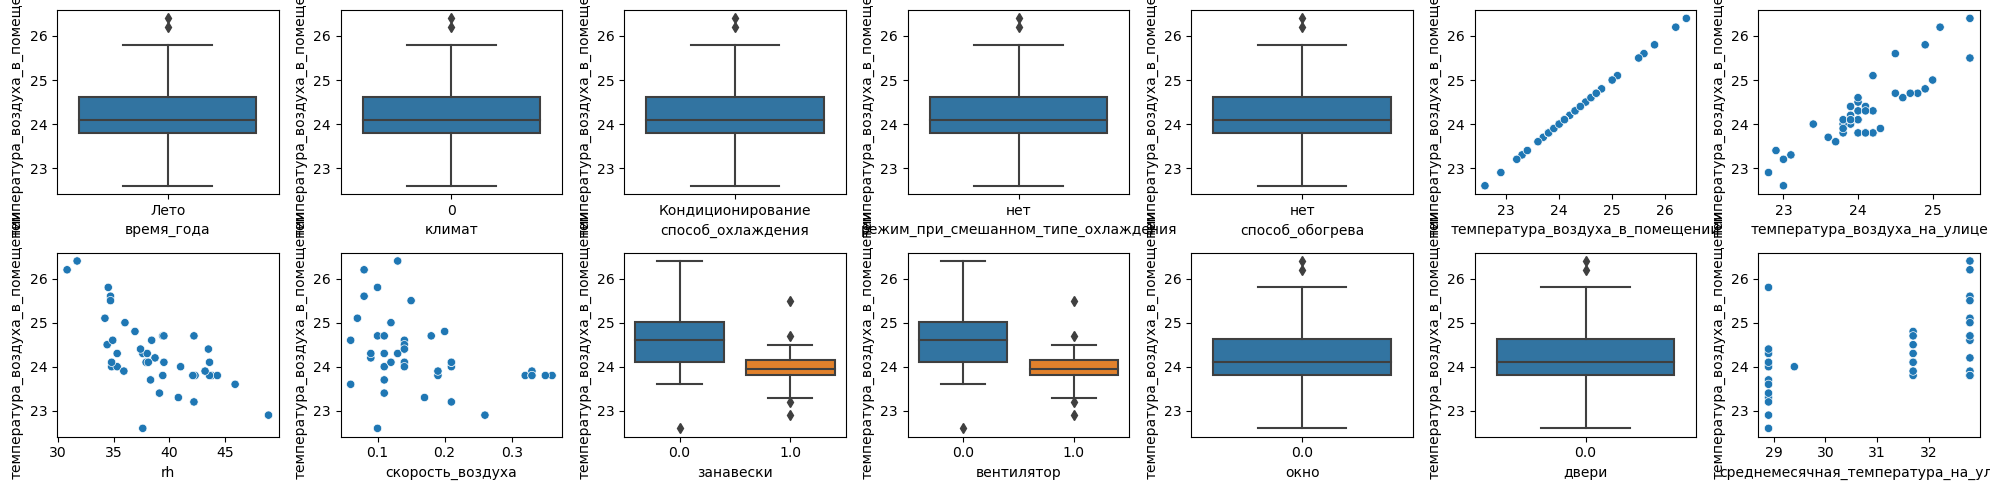

In [122]:
fig, ax = plt.subplots(2, 7, figsize=(20, 5))
i = 0
for col in factors.columns:
    get_plot(factors[col], factors['температура_воздуха_в_помещении'], types[col], types['температура_воздуха_в_помещении'], i // 7, i % 7)
    i += 1
fig.tight_layout()

In [137]:
factors = df[['rh', 'занавески', 'вентилятор']]
target = df['температура_воздуха_в_помещении']

In [138]:
for col in factors.columns:
    if factors[col].dtype not in ['float', 'int']:
        enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        factors[(col + ': ' + factors[col].unique()).tolist()] = enc.fit_transform(factors[[col]])
        factors.drop(col, axis=1, inplace=True)

In [139]:
x_train, x_test, y_train, y_test = train_test_split(factors, target, test_size=0.15, random_state=42)

In [135]:
# reg = LinearRegression()
# reg.fit(x_train, y_train)
reg.score(x_test, y_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [141]:
from joblib import dump, load
# dump(reg, 'regressor.joblib')

In [142]:
reg = load('regressor.joblib')

sklearn.linear_model._base.LinearRegression